In [ ]:
# https://medium.com/international-school-of-ai-data-science/increase-the-performance-of-image-classification-models-b466e1ae3101
# https://stackoverflow.com/questions/32609098/how-to-fast-change-image-brightness-with-python-opencv
# https://www.datacamp.com/tutorial/complete-guide-data-augmentation
# https://www.kaggle.com/code/parulpandey/overview-of-popular-image-augmentation-packages

In [13]:
#!pip install imageio
#!pip install scikit-image
#!pip install tensorflow
#!pip install opencv-python
#!pip install tensorflow_datasets
#!pip install matplotlib
#!pip install scipy
#!pip install keras-cv tensorflow

In [1]:
# OS ops
import os
# (image) filie handling
import imageio.v3 as iio
from PIL import Image
# image processing
from skimage.util import random_noise
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator   # type: ignore
from keras import layers
import keras_cv
import cv2 as cv
#core
import numpy as np
import tensorflow_datasets as tfds
import keras
#plotting
import matplotlib.pyplot as plt

In [2]:
# path to the locally saved raw dataset (identical to the one on the shared Google Drive):
img_dir = os.path.join("C:", os.sep, "Users", "jeos", "Prj","WB","DST","DS","data","raw")
# path to a representative image of PlantVillage dataset's diseased (grown) plant:
img_path_grw_pl_dss = os.path.join(img_dir,"Apple___Apple_scab", "image (1).JPG")
# path to a representative image of PlantVillage dataset's healthy (grown) plant:
img_path_grw_pl_hlt = os.path.join(img_dir,"Corn___healthy", "image (1).jpg")
# path to a representative image of Seedlings' dataset's [healthy] (seedling) plant:
img_path_sdl_pl_hlt = os.path.join(img_dir,"Cleavers", "1.png")
# for TensorFlow Dataset
img_dir_tfds = os.path.join("C:", os.sep, "Users", "jeos", "Prj","WB","DST","DS","data","tfds")

In [3]:
# loading [(open->)read] of the selected raw images (without augmentation)
"""using 'imageio.v3'"""
img_grw_pl_dss = \
  img_grw_pl_dss_iio=iio.imread(img_path_grw_pl_dss)
img_grw_pl_hlt = \
  img_grw_pl_hlt_iio=iio.imread(img_path_grw_pl_hlt)
img_sdl_pl_hlt = \
  img_sdl_pl_hlt_iio=iio.imread(img_path_sdl_pl_hlt)
"""using 'PIL'"""
img_grw_pl_dss_pil = Image.open(img_path_grw_pl_dss)
img_grw_pl_hlt_pil = Image.open(img_path_grw_pl_hlt)
img_sdl_pl_hlt_pil = Image.open(img_path_sdl_pl_hlt)
"""using 'tensorflow_datasets'"""
builder = tfds.ImageFolder(img_dir_tfds)
ds = builder.as_dataset(split='train', shuffle_files=True)

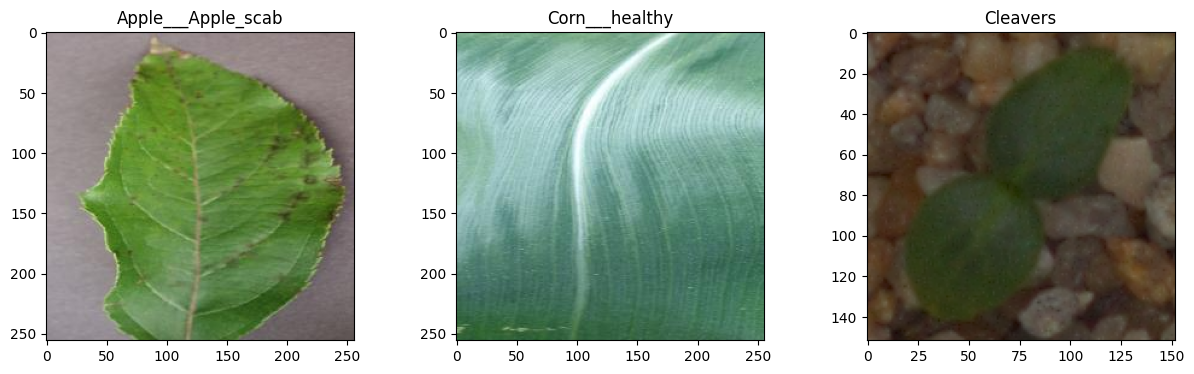

In [4]:
# plotting of selected raw images (without augmentation)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(5*3,4*1))
axs = ax.reshape(1,-1)[0]

axs[0].imshow(img_grw_pl_dss)
axs[0].set_title("Apple___Apple_scab")

axs[1].imshow(img_grw_pl_hlt)
axs[1].set_title("Corn___healthy")

axs[2].imshow(img_sdl_pl_hlt)
axs[2].set_title("Cleavers")

plt.show();plt.close();

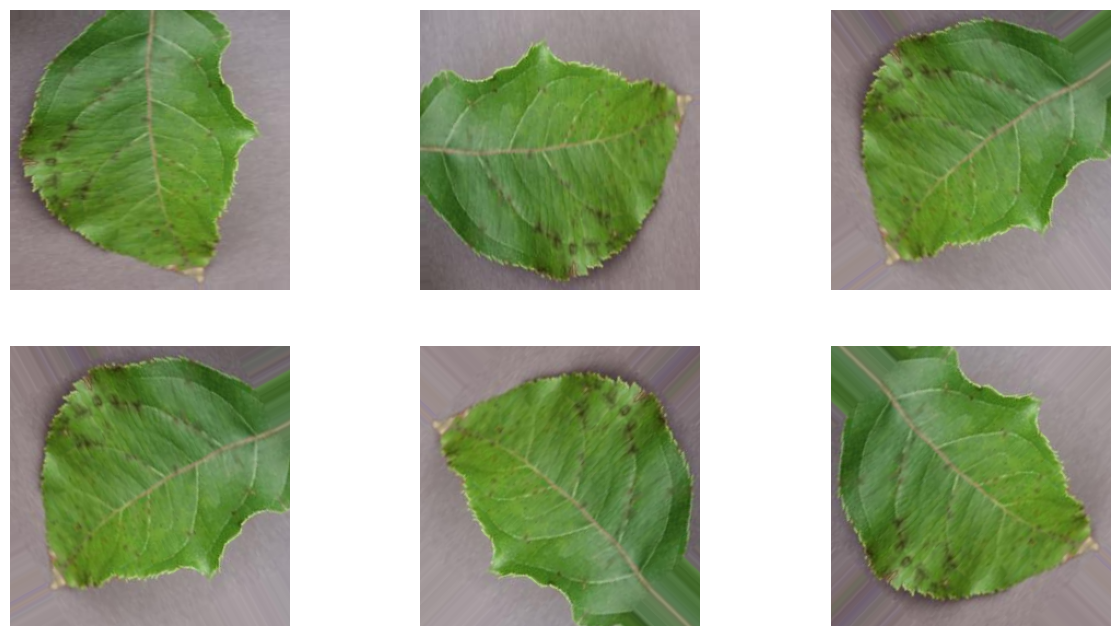

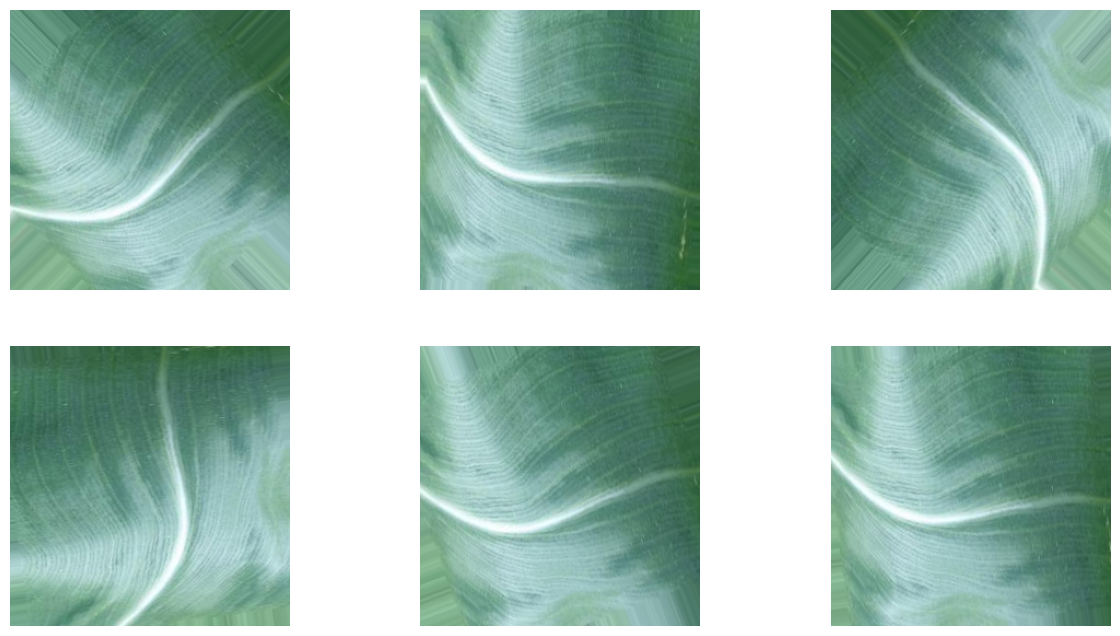

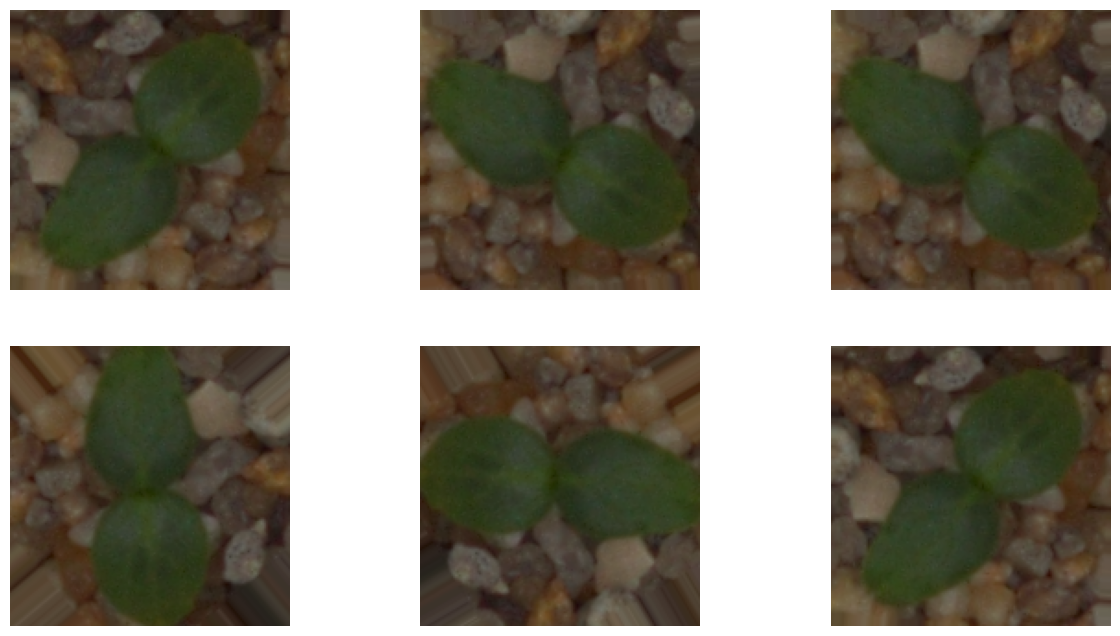

In [5]:
# Augmentation I.1: geometric transformations -> rotation
"""using tensorflow/keras/ImageDataGenerator"""
MAX_ROT = 360
FILL_MODE = 'nearest'
BATCH_SZ_PLOT = 6

datagen = ImageDataGenerator(rotation_range=MAX_ROT, fill_mode=FILL_MODE)

# Preprocess loaded Images
img_grw_pl_dss_arr = np.asarray(img_grw_pl_dss_pil)
img_grw_pl_dss_arr_exdim = np.expand_dims(img_grw_pl_dss_arr, axis=0)
img_grw_pl_hlt_arr = np.asarray(img_grw_pl_hlt_pil)
img_grw_pl_hlt_arr_exdim = np.expand_dims(img_grw_pl_hlt_arr, axis=0)
img_sdl_pl_hlt_arr = np.asarray(img_sdl_pl_hlt_pil)
img_sdl_pl_hlt_arr_exdim = np.expand_dims(img_sdl_pl_hlt_arr, axis=0)

# Iterators
aug_iter_grw_pl_dss = datagen.flow(img_grw_pl_dss_arr_exdim, batch_size=1)
aug_iter_grw_pl_hlt = datagen.flow(img_grw_pl_hlt_arr_exdim, batch_size=1)
aug_iter_sdl_pl_hlt = datagen.flow(img_sdl_pl_hlt_arr_exdim, batch_size=1)

# plotting of selected images (with augmentation[s])
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(5*3,4*2))
axs = ax.reshape(1,-1)[0]

for i in range(BATCH_SZ_PLOT):
  image_grw_pl_dss = next(aug_iter_grw_pl_dss)[0].astype('uint8')

  axs[i].imshow(image_grw_pl_dss)
  axs[i].axis('off')
plt.show();plt.close();

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(5*3,4*2))
axs = ax.reshape(1,-1)[0]

for i in range(BATCH_SZ_PLOT):
  image_grw_pl_hlt = next(aug_iter_grw_pl_hlt)[0].astype('uint8')

  axs[i].imshow(image_grw_pl_hlt)
  axs[i].axis('off')
plt.show();plt.close();

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(5*3,4*2))
axs = ax.reshape(1,-1)[0]

for i in range(BATCH_SZ_PLOT):
  image_sdl_pl_hlt = next(aug_iter_sdl_pl_hlt)[0].astype('uint8')

  axs[i].imshow(image_sdl_pl_hlt)
  axs[i].axis('off')
plt.show();plt.close();

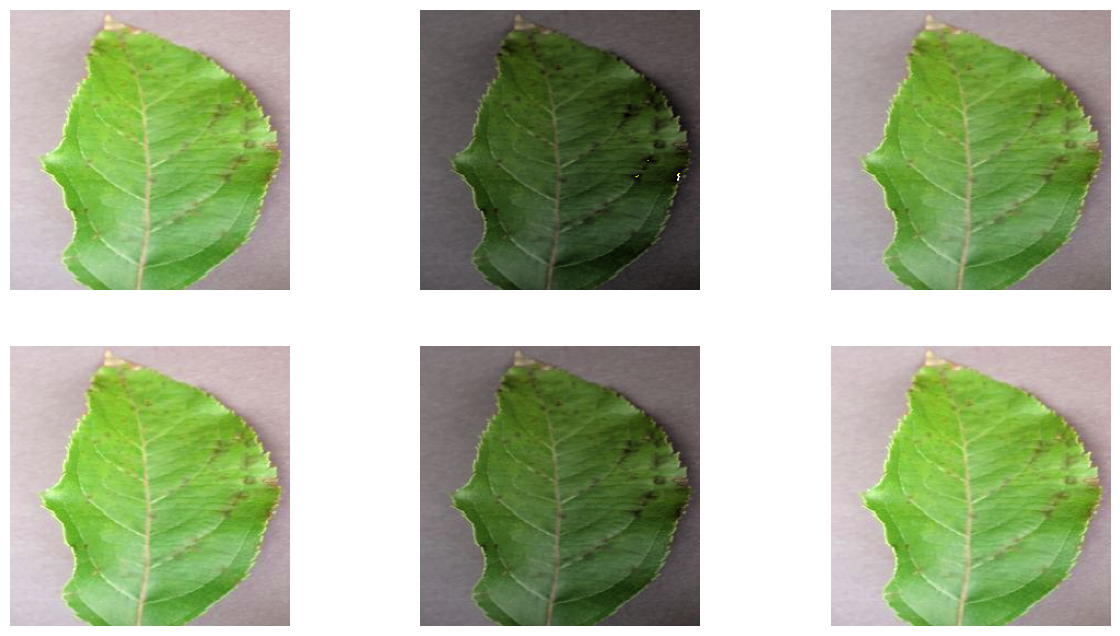

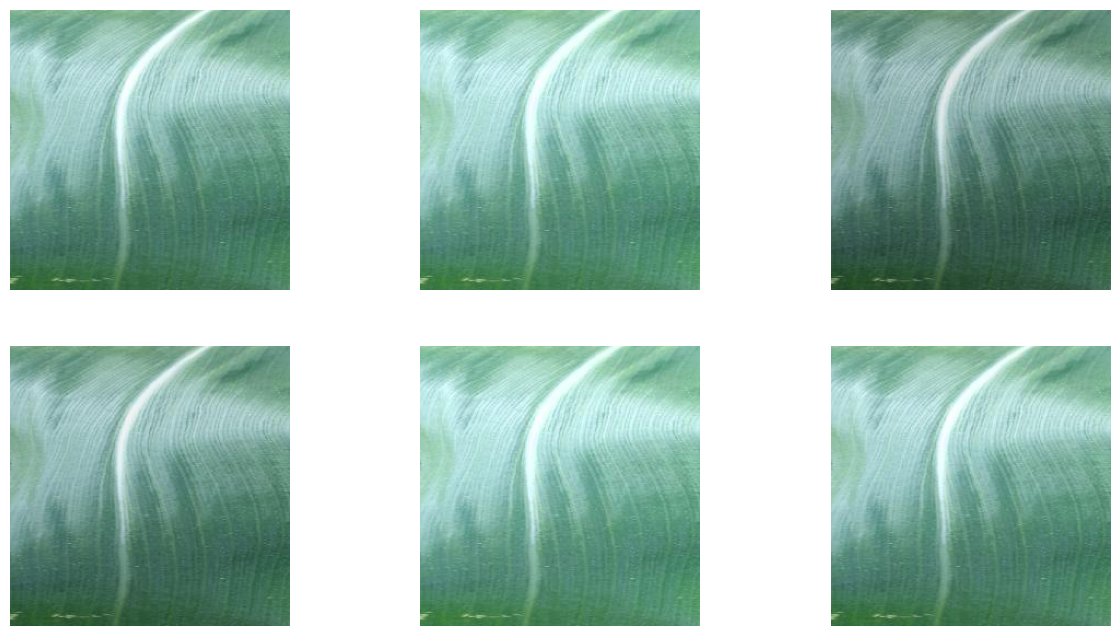

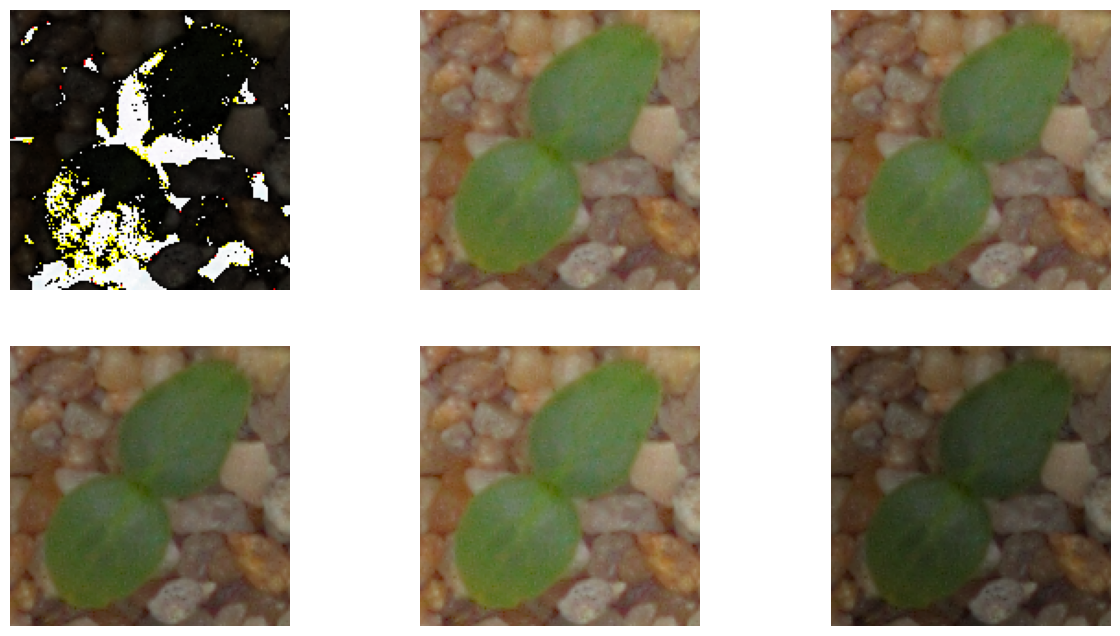

In [6]:
# Augmentation II.1: color space transformations -> brightness
"""using tensorflow/keras/ImageDataGenerator"""

# BRI_RNG = [0.2,2.0]
BRI_RNG = [-255//4,255//4]
FILL_MODE = 'nearest'
BATCH_SZ_PLOT = 6

# customized preprocessing function
def random_brightness(image):
    image = image[:,:,::-1]
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    h, s, v = cv.split(hsv)

    value = np.random.default_rng().random()*(BRI_RNG[1] - BRI_RNG[0])+BRI_RNG[0]
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv.merge((h, s, v))
    img = cv.cvtColor(final_hsv, cv.COLOR_HSV2BGR)
    img = img[:,:,::-1]
    return img

#datagen = ImageDataGenerator(brightness_range=BRI_RNG, fill_mode=FILL_MODE)
datagen = ImageDataGenerator(preprocessing_function=random_brightness, fill_mode=FILL_MODE)

# Preprocess loaded Images
img_grw_pl_dss_arr = np.asarray(img_grw_pl_dss_pil)
img_grw_pl_dss_arr_exdim = np.expand_dims(img_grw_pl_dss_arr, axis=0)
img_grw_pl_hlt_arr = np.asarray(img_grw_pl_hlt_pil)
img_grw_pl_hlt_arr_exdim = np.expand_dims(img_grw_pl_hlt_arr, axis=0)
img_sdl_pl_hlt_arr = np.asarray(img_sdl_pl_hlt_pil)
img_sdl_pl_hlt_arr_exdim = np.expand_dims(img_sdl_pl_hlt_arr, axis=0)

# Iterators
aug_iter_grw_pl_dss = datagen.flow(img_grw_pl_dss_arr_exdim, batch_size=1)
aug_iter_grw_pl_hlt = datagen.flow(img_grw_pl_hlt_arr_exdim, batch_size=1)
aug_iter_sdl_pl_hlt = datagen.flow(img_sdl_pl_hlt_arr_exdim, batch_size=1)

# plotting of selected images (with augmentation[s])
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(5*3,4*2))
axs = ax.reshape(1,-1)[0]

for i in range(BATCH_SZ_PLOT):
  image_grw_pl_dss = next(aug_iter_grw_pl_dss)[0].astype('uint8')

  axs[i].imshow(image_grw_pl_dss)
  axs[i].axis('off')
plt.show();plt.close();

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(5*3,4*2))
axs = ax.reshape(1,-1)[0]

for i in range(BATCH_SZ_PLOT):
  image_grw_pl_hlt = next(aug_iter_grw_pl_hlt)[0].astype('uint8')

  axs[i].imshow(image_grw_pl_hlt)
  axs[i].axis('off')
plt.show();plt.close();

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(5*3,4*2))
axs = ax.reshape(1,-1)[0]

for i in range(BATCH_SZ_PLOT):
  image_sdl_pl_hlt = next(aug_iter_sdl_pl_hlt)[0].astype('uint8')

  axs[i].imshow(image_sdl_pl_hlt)
  axs[i].axis('off')
plt.show();plt.close();

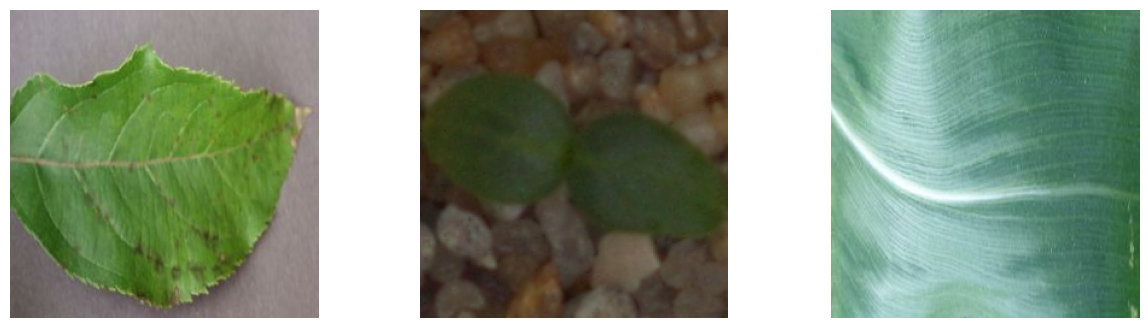

In [24]:
# Augmentation I.13: geometric transformations -> combo: rotation & flip
"""using 'keras.Sequential'"""
FLIP_TP = "horizontal_and_vertical"
MAX_ROT = 0.4

#setting augmentation layer
rotation_flip = keras.Sequential([
  layers.RandomFlip(FLIP_TP),
  layers.RandomRotation(MAX_ROT),
])

# plotting of selected images (with augmentation[s])
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(5*3,4*1))
axs = ax.reshape(1,-1)[0]
i=0

for example in ds:
  axs[i].imshow(rotation_flip(example["image"]).numpy()/255)
  axs[i].axis("off")
  i+=1
plt.show();plt.close();

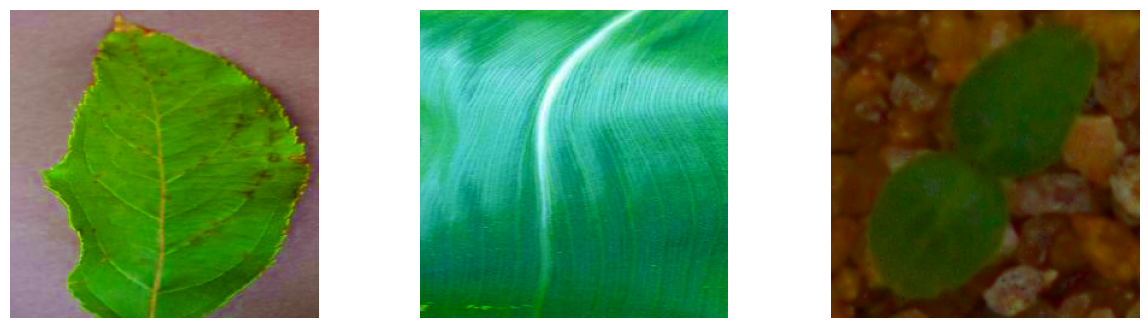

In [9]:
# Augmentation II.2: color space transformations -> saturation/contrast
"""using 'tf.image'"""
SAT_FCT = 3
# plotting of selected images (with augmentation[s])
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(5*3,4*1))
axs = ax.reshape(1,-1)[0]
i=0

for example in ds:
  axs[i].imshow(tf.image.adjust_saturation(example["image"],SAT_FCT))
  axs[i].axis("off")
  i+=1
plt.show();plt.close();

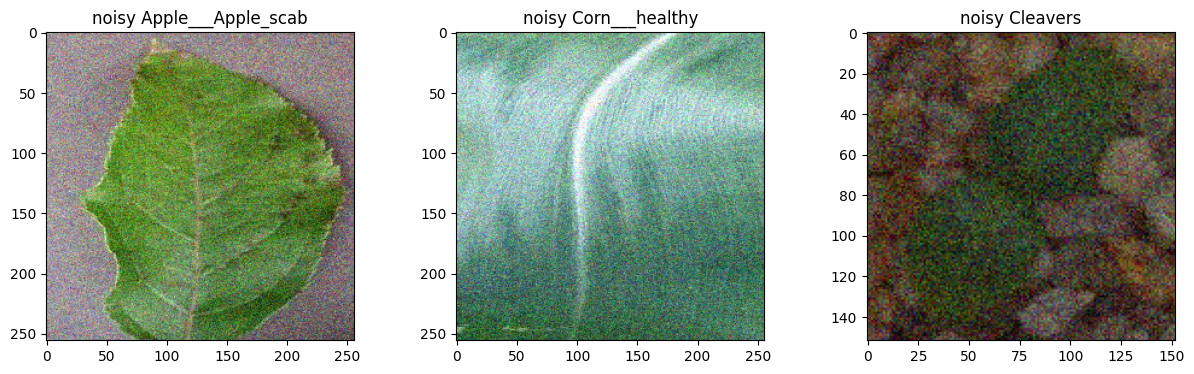

In [10]:
# Augmentation III.1: noise injection -> Gaussian
"""using 'skimage'"""
GSN_MEAN = 0
GSN_VAR = 0.01

# plotting of selected images (with augmentation[s])
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(5*3,4*1))
axs = ax.reshape(1,-1)[0]

axs[0].imshow(random_noise(img_grw_pl_dss,mode='gaussian', mean = GSN_MEAN, var=GSN_VAR))
axs[0].set_title("noisy Apple___Apple_scab")

axs[1].imshow(random_noise(img_grw_pl_hlt,mode='gaussian', mean = GSN_MEAN, var=GSN_VAR))
axs[1].set_title("noisy Corn___healthy")

axs[2].imshow(random_noise(img_sdl_pl_hlt,mode='gaussian', mean = GSN_MEAN, var=GSN_VAR))
axs[2].set_title("noisy Cleavers")

plt.show();plt.close();

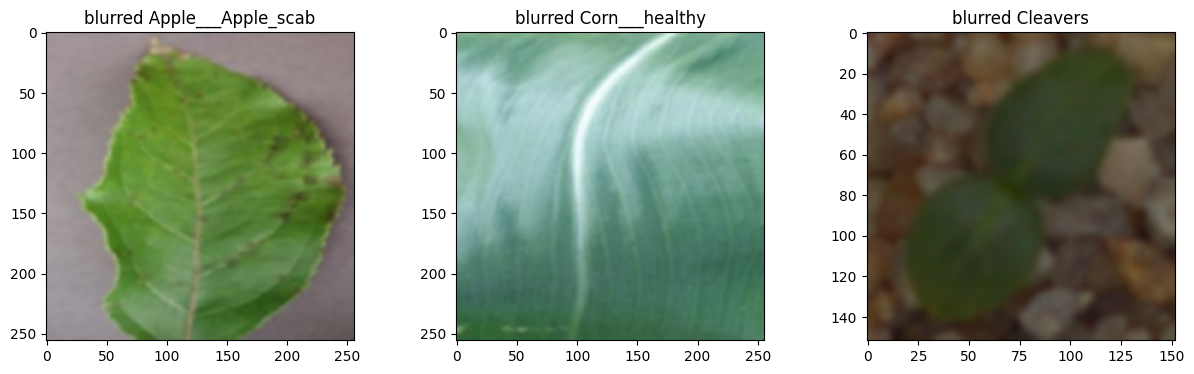

In [11]:
# Augmentation IV.1: blurring -> Gaussian
"""using 'cv2'"""
BLR_FLT = (7,7)
BLR_STD_XY = 0

# plotting of selected images (with augmentation[s])
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(5*3,4*1))
axs = ax.reshape(1,-1)[0]

axs[0].imshow(cv.GaussianBlur(img_grw_pl_dss,BLR_FLT,BLR_STD_XY))
axs[0].set_title("blurred Apple___Apple_scab")

axs[1].imshow(cv.GaussianBlur(img_grw_pl_hlt,BLR_FLT,BLR_STD_XY))
axs[1].set_title("blurred Corn___healthy")

axs[2].imshow(cv.GaussianBlur(img_sdl_pl_hlt,BLR_FLT,BLR_STD_XY))
axs[2].set_title("blurred Cleavers")

plt.show();plt.close();

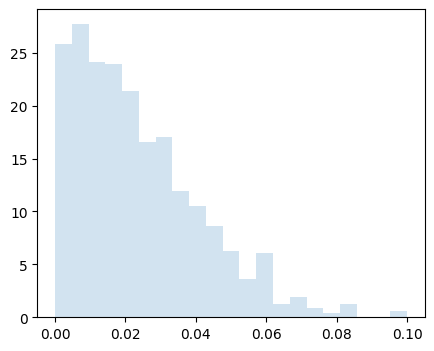

In [12]:
from scipy.stats import skewnorm
def right_skewed_distr(magnitude, pool_size, min_n, max_n):
  r = skewnorm.rvs(magnitude, size=pool_size) 
  r_min = min(r)
  r_max = max(r) 
  r_rng = max(r) - min(r)
  r_minmax = (r - r_min)/r_rng
  r_scaled = r_minmax *(max_n - min_n) + min_n
  return np.random.choice(r_scaled)
gen_lst = [right_skewed_distr(100, 1000, 0, 0.1) for i in range(1000)]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5*1,4*1))
ax.hist(gen_lst, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.show();plt.close();

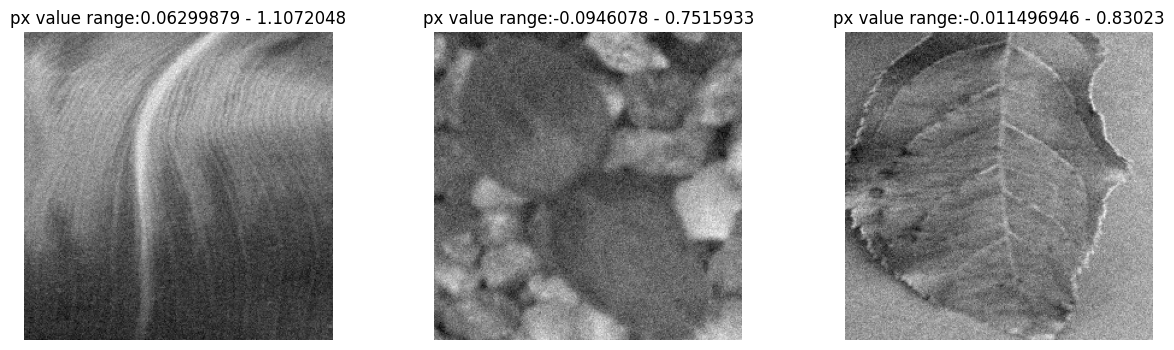

In [20]:
# Augmentation III.13: (6-)combo -> rescale & flip & rotation & zoom in & contrast adjustment & Gaussian noise 
"""using 'keras.Sequential'"""
from IPython.display import clear_output
px_rescale = 1./255
rot_2pi_fac_rng = (-0.05, 0.05)
zoom_in_rng = (-0.2, 0)
contr_1plumin_rng = (0, 1)
brig_rng = (-0.2, 0.2)
skew_mgn = 100
skew_dist_size = 1000
gaus_noise_std = right_skewed_distr(skew_mgn, skew_dist_size, 0, 0.1)

#setting augmentation layer
combo = keras.Sequential([
  layers.Resizing(256, 256),
  keras_cv.layers.Grayscale(),
  layers.RandomFlip("horizontal_and_vertical"),
  ##layers.RandomRotation(rot_2pi_fac_rng),
  layers.RandomZoom(zoom_in_rng),
  layers.RandomContrast(contr_1plumin_rng),
  layers.RandomBrightness(brig_rng),
  layers.Rescaling(px_rescale),
  layers.GaussianNoise(gaus_noise_std)
])

# plotting of selected images (with augmentation[s])
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(5*3,4*1))
axs = ax.reshape(1,-1)[0]
i=0

for example in ds:
  image = combo(example["image"], training = True)
  axs[i].imshow(image, cmap = "gray") #Gaussian noise gets activated only in the training mode
  axs[i].axis("off")
  axs[i].set_title("px value range:" + str(image.numpy().min())+" - "+str(image.numpy().max()))
  i+=1
clear_output() #surpresses warnings (are irrelevant)
plt.show();plt.close();